<span  style="color:green; font-size: 250%;">M2 - WEEK 5 | PROJECT: Visualizing Data for DS Team Head and CEO</span>



<span  style="color:orange; font-size: 200%;">+++ Business case and problem</span>


#### I am working for Kickstarter.com : an online platform that make ideas into reality. It’s where creators share new visions for creative work with the communities that will come together to fund them. In other words its where you ask the world to believe and invest in your project.
#### - How kickstarer.com win money: get a percentage on the total amount you got if your project succeed to get full funds.
#### - The more successufull projects, the more benefit: i have 2 main tasks: 
#### 1- Kickstarter is planning to start a big online marketing compaign and they will include some new projects in that compaign: What are the best choices (e.g. category, duration,...) for exemplary projects to showcase in the campaign?
#### 2- they want to advice new users on how to have better chances to succeed : is there some hiddens variables that we can control?
#### I used kaggle kickstarter projects dataset for this module  project with more than 300k projects

<span  style="color:orange; font-size: 200%;">+++ Data Preparation</span>


### -- Required libraries --

In [1]:
import pandas as pd # for Data manipulation
import numpy as np
import matplotlib.pyplot as plt # for plotting
from matplotlib.gridspec import GridSpec
import seaborn as sns # more attractive and informative statistical graphics
import plotly.express as px # fast easy plot

sns.set(style="ticks")
%matplotlib inline


### -- Useful functions  --

In [2]:

# define a function to show percenrages in seaborn countplot.
def show_per(fig,df):
    total = float(len(df))

    for p in fig.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        fig.annotate(percentage, (x, y),ha='center')
    return fig


def multi_plt(df):
    df.groupby(["state"])[["state"]].count().unstack().plot.pie(autopct="%.1f%%",explode=[0.02]*2, 
                                                                labels=["Failed","successful"], pctdistance=0.2,colors = colors,)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    global fig # to be able to change it's value for smaller plots
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    #TO REMOVE THE NONE ON THE LEFT SIDE OF THE PLOT
    for axis in fig.axes:
        axis.yaxis.set_label_text( "")
    fig.set_size_inches(20,12)

def multi_plt_ensmble(country,cat1,cat2,cat3,cat4):
    the_grid = GridSpec(2, 2)

    plt.subplot(the_grid[0, 1])
    df_tmp = df[(df.main_category == cat1)  & (df.country == country)]
    multi_plt(df_tmp)
    plt.title(cat1, fontsize=14);

    plt.subplot(the_grid[0, 0])
    df_tmp = df[(df.main_category == cat2)  & (df.country == country)]
    multi_plt(df_tmp)
    plt.title(cat2, fontsize=14);

    plt.subplot(the_grid[1, 0])
    df_tmp = df[(df.main_category == cat3)  & (df.country == country)]
    multi_plt(df_tmp)
    plt.title(cat3, fontsize=14);

    plt.subplot(the_grid[1, 1])
    df_tmp = df[(df.main_category == cat4)  & (df.country == country)]
    multi_plt(df_tmp)
    plt.title(cat4, fontsize=14);

    fig.suptitle('Best and worst categories in the '+str(country), fontsize=16)

    fig.set_size_inches(12,10)

# define a fucntion who take a pandas df and transform it's columns to categorical and then convert them to numbers for better Data analyse 
# (this case is one of the difference between Python and R, because in R we can epresent categorical data as factors without manually mapping)
# we can use the preprocessing package from scikit-learn library but i decided to use pandas for this assignment
# NaN values will become -1

def convert_cat_2_num(df):
    temp_df = pd.DataFrame()

    for column in df.columns:
        temp_df[column] = df[column].astype("category").cat.codes
    return temp_df

### -- Read the csv file as Pandas Dataframe --

In [3]:
# I used parse_dates to simplify the treatment of those 2 date columns later 

df = pd.read_csv("ks-projects-201801.csv", parse_dates=['deadline','launched'])
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
# get some basic infos about the DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [6]:
# the shape of the DF : There are 378661 rows and 15 columns
df.shape

(378661, 15)

In [7]:
list(df.state.unique())

['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']

In [8]:
# for the purpose of this assignment i will just keep the states successful & failed
df = df[(df.state == "successful") | (df.state == "failed")]
list(df.state.unique())

['failed', 'successful']

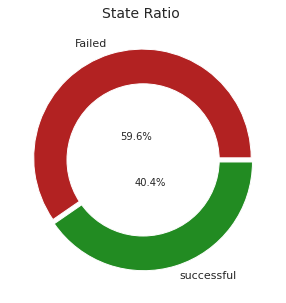

In [9]:
colors = ['#B22222','#228B22']

df.groupby(["state"])[["state"]].count().unstack().plot.pie(autopct="%.1f%%",explode=[0.02]*2, labels=["Failed","successful"], pctdistance=0.2,colors = colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#TO REMOVE THE NONE ON THE LEFT SIDE OF THE PLOT
for axis in fig.axes:
        axis.yaxis.set_label_text( "")
plt.title("State Ratio ", fontsize=14)
fig.set_facecolor('white')
fig.set_size_inches(8,5)
plt.savefig('1.png')
plt.show()


 ### -- Observations --
 #### ++ just 40% of the projects succeed, we need to find a way to have better chances ++


 ### -- Backers --

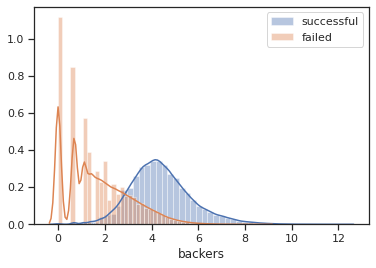

In [10]:
sns.distplot(np.log(df[df['state'] == 'successful']['backers']+1), label='successful')
sns.distplot(np.log(df[df['state'] == 'failed']['backers']+1), label='failed')
plt.legend()
plt.savefig('2.png')
plt.show()

 ### -- Observations --
 #### ++ the more backers we have, the more chances of the project being successful. ++

 ### -- Main Category --

In [11]:
print("we have {} different main Categories divided in {} sub-categories".format(df.main_category.nunique(),df.category.nunique()))

we have 15 different main Categories divided in 159 sub-categories


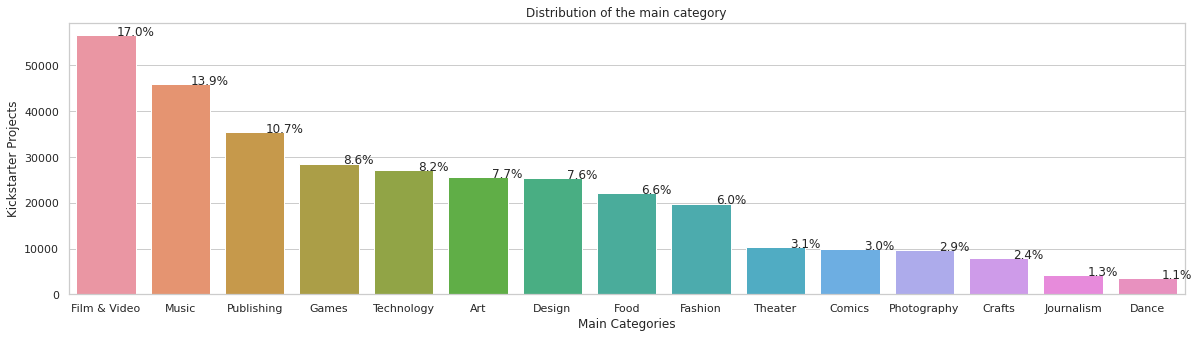

In [12]:
#Distribution of the main category
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
order = df['main_category'].value_counts(ascending=False).index
fig = sns.countplot(x='main_category', data=df, order=order)
fig.set(xlabel="Main Categories", ylabel='Kickstarter Projects',title='Distribution of the main category')
# estimator=lambda x: len(x) / len(df) * 100 can be used with sns.barplot but sns.countplot have no estimator:  
#thanks for the tip becaue i will use it for sure with sns.barplot
show_per(fig,df)
plt.savefig('3.png')
plt.show()

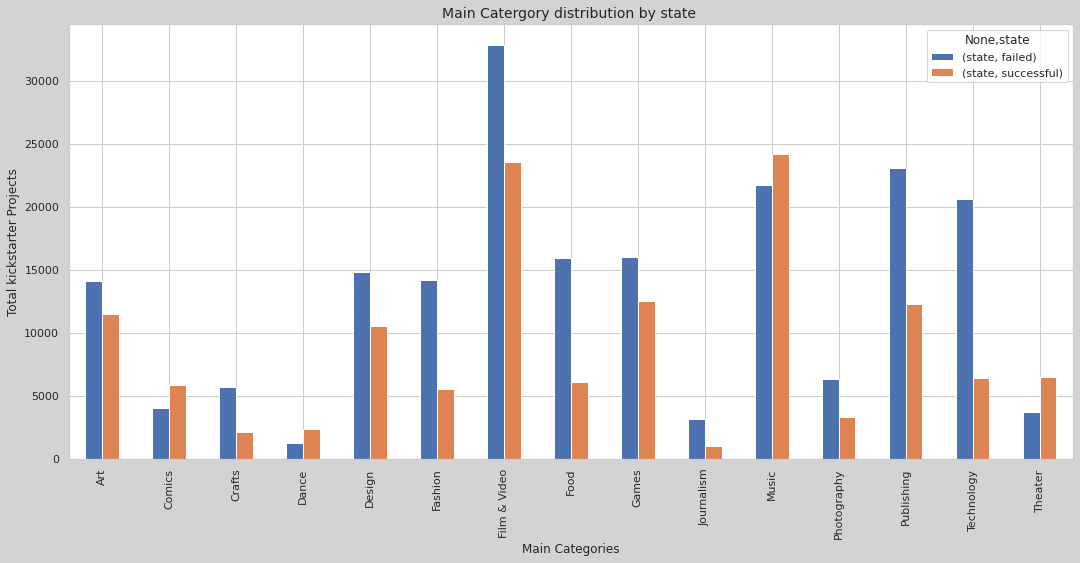

In [13]:
                 # ----- main_category ------ State ------- #


df.groupby(["main_category","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Main Categories")

plt.title("Main Catergory distribution by state ", fontsize=14)
plt.savefig('4.png')
plt.show()

 ### -- Observations --
 #### ++ Categories : Comics, Music and Theater have more chances for success ++
 #### ++ Categories : Food, Publishing and Technology have less chances for success ++

 ### -- Top 3 countries --

In [14]:
# Kickstarters.com is interested in the top 3 countries for its social media compaign
top_3 = df.groupby('country')['country'].count().sort_values(ascending = False).head(3) 
print("Top 3 countries:\n", top_3)

Top 3 countries:
 country
US    261360
GB     29454
CA     12370
Name: country, dtype: int64


In [15]:
#let's keep only the Data of those top 3 countries
df = df[(df.country == "US") | (df.country == "GB") | (df.country == "CA")]
list(df.country.unique())

['GB', 'US', 'CA']

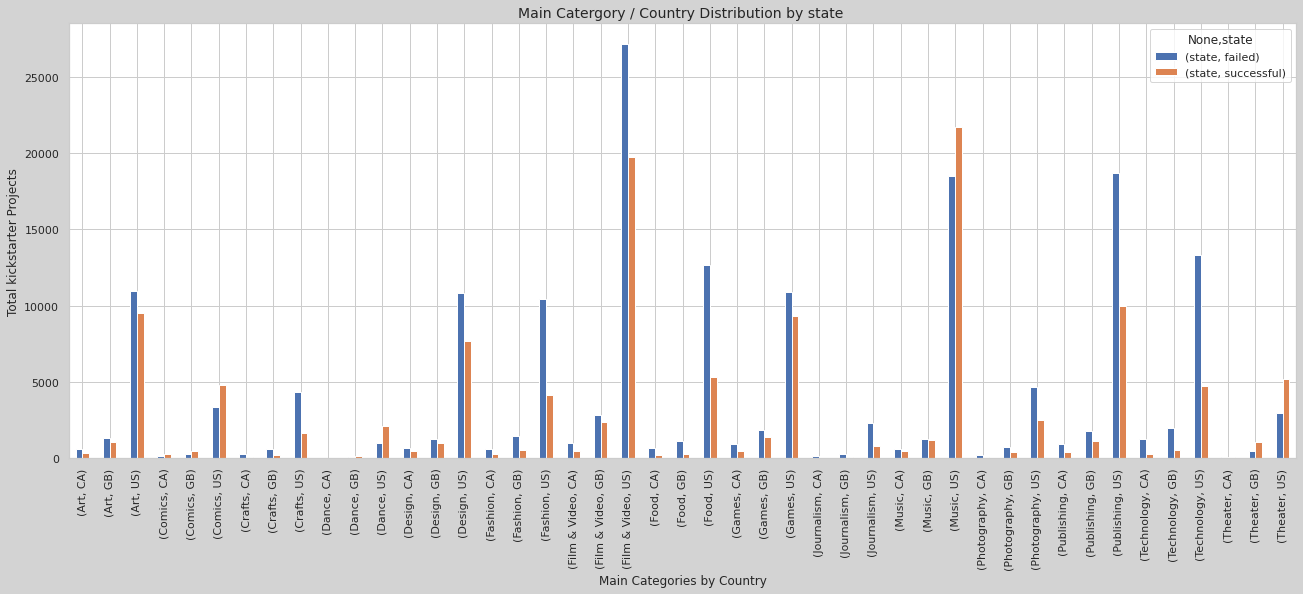

In [16]:
                 # ----- main_category ------Country------------ State ------- #
# for team leader

df.groupby(["main_category","country","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(22,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Main Categories by Country")

plt.title("Main Catergory / Country Distribution by state ", fontsize=14)

plt.show()

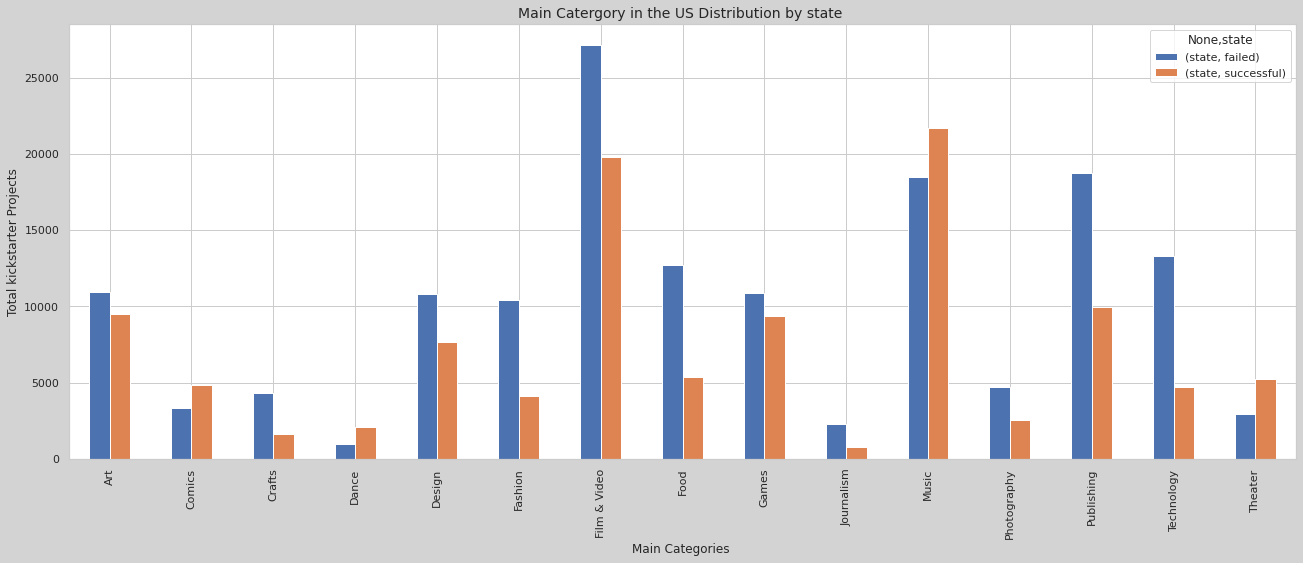

In [17]:

                 # ----- main_category ------ Country = US -------   State ------- #
# for team leader
df_tmp = df[df.country == 'US']
df_tmp.groupby(["main_category","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(22,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Main Categories ")

plt.title("Main Catergory in the US Distribution by state ", fontsize=14)
plt.savefig('5.png')
plt.show()

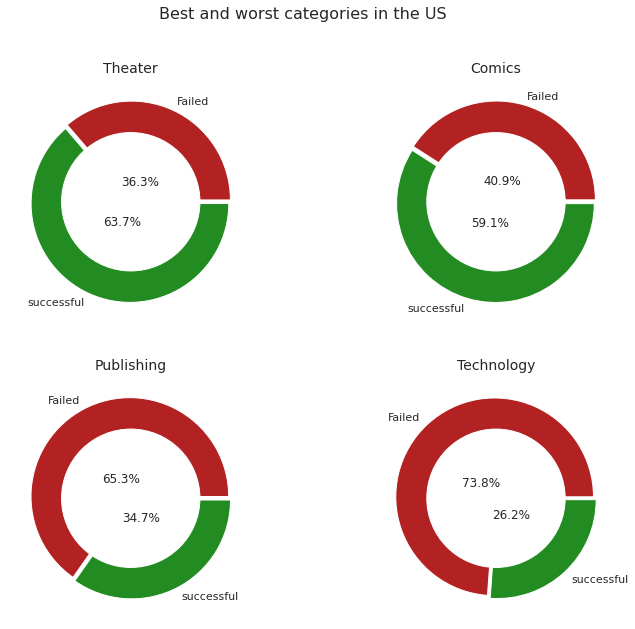

In [18]:
#for the CEO
multi_plt_ensmble("US","Comics","Theater","Publishing", "Technology")
plt.savefig('5-5.png')
plt.show()

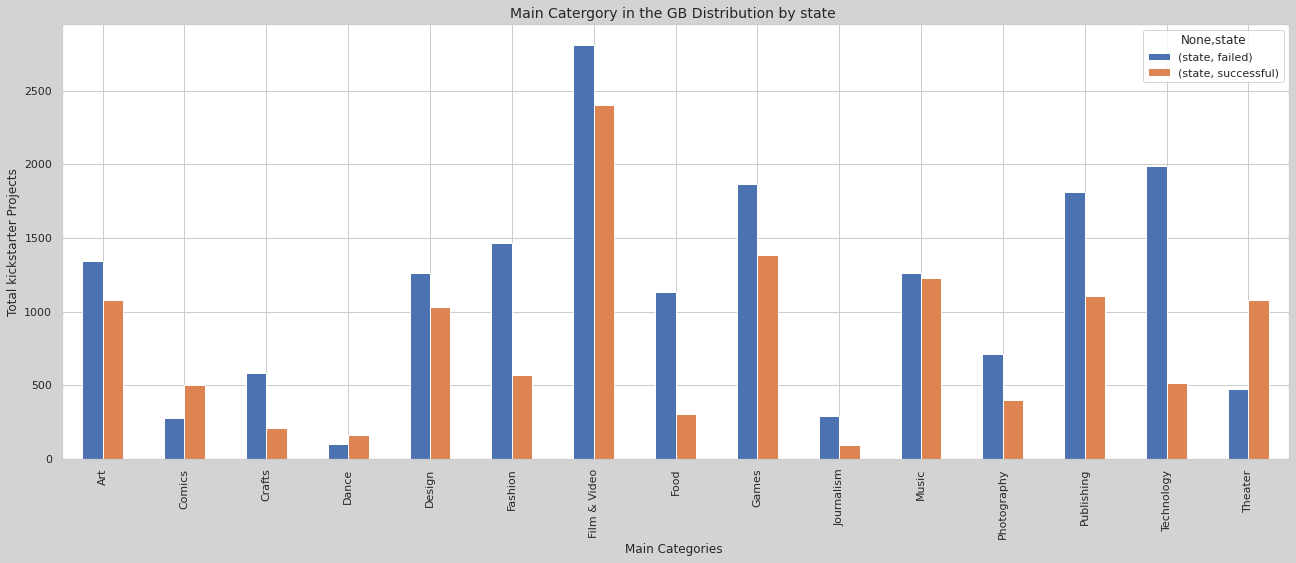

In [19]:
                 # ----- main_category ------ Country = GB -------   State ------- #
# for team leader
df_tmp = df[df.country == 'GB']
df_tmp.groupby(["main_category","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(22,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Main Categories ")

plt.title("Main Catergory in the GB Distribution by state ", fontsize=14)
plt.savefig('6.png')
plt.show()

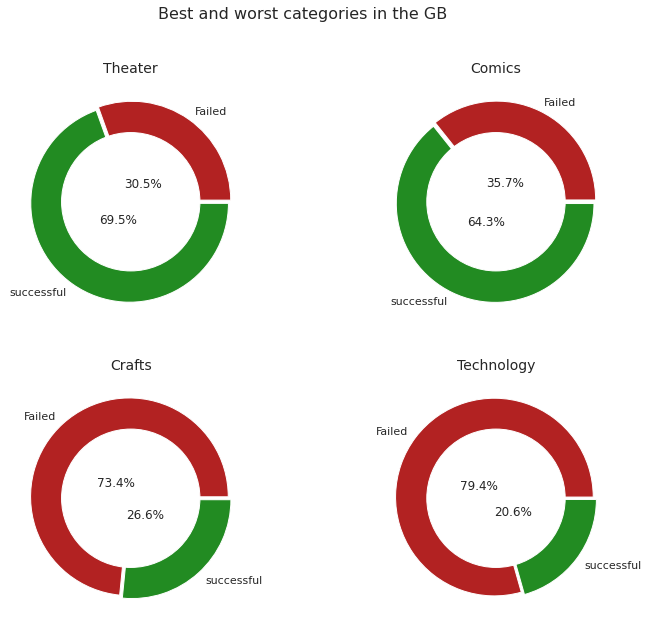

In [20]:
#for the CEO
multi_plt_ensmble("GB","Comics","Theater","Crafts", "Technology")
plt.savefig('6-6.png')
plt.show()

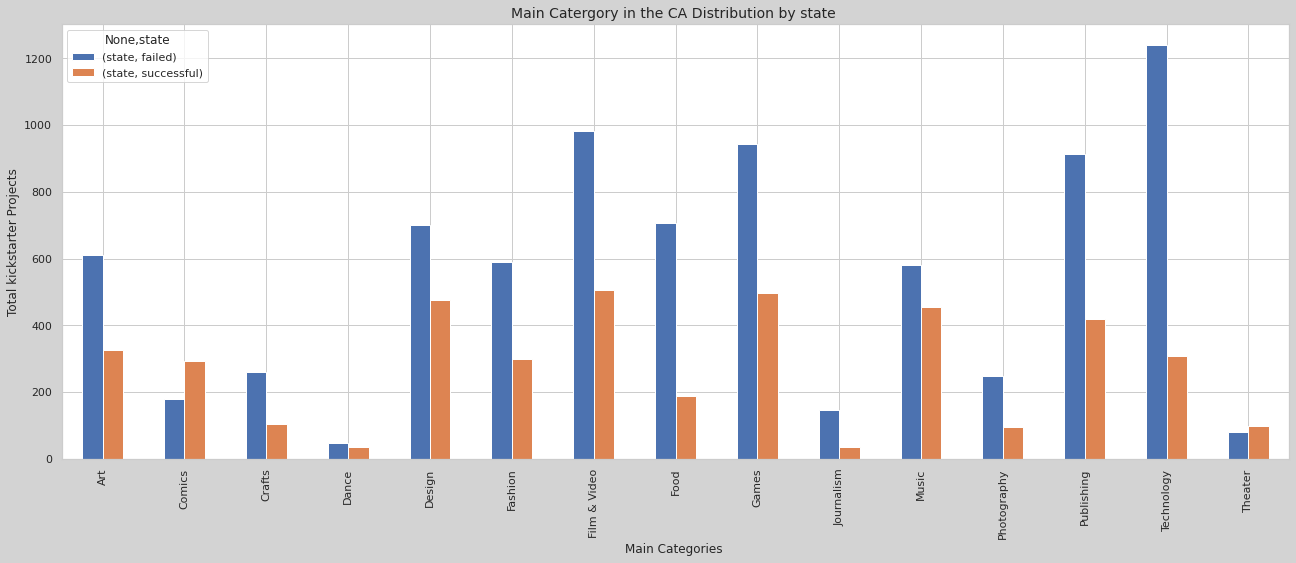

In [21]:

                 # ----- main_category ------ Country = CA -------   State ------- #
# for team leader
df_tmp = df[df.country == 'CA']
df_tmp.groupby(["main_category","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(22,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Main Categories ")

plt.title("Main Catergory in the CA Distribution by state ", fontsize=14)
plt.savefig('7.png')
plt.show()

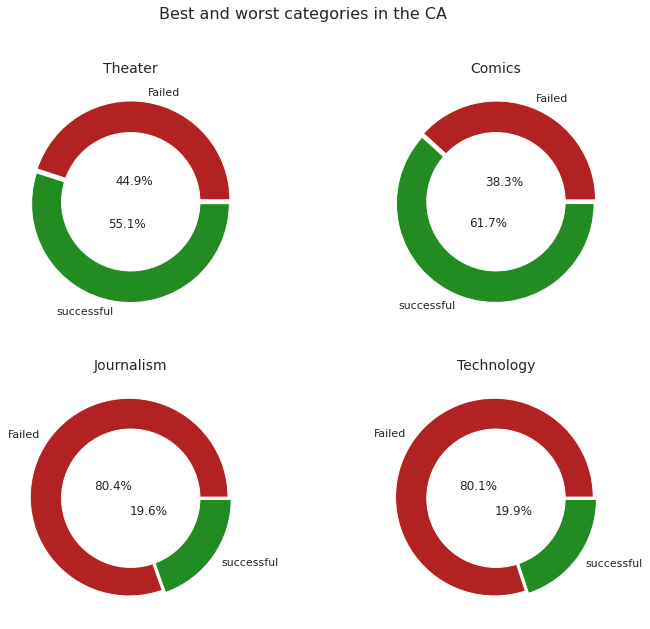

In [22]:
#for the CEO
multi_plt_ensmble("CA","Comics","Theater","Journalism", "Technology")
plt.savefig('7-7.png')
plt.show()

 ### -- Observations --
 #### ++ the most fails category in Canada is Technology but in the US and GB is Film & Video
 #### ++ Category Music have more chances of success only in the US
 #### ++ Categories Theater and Comics have more chances of success in all the top 3 countries


 ### -- Hours --

In [23]:
# divide the columns launched to 4 # columns: hour, day,month,year
df = df.assign(hour=df.launched.dt.hour,day=df.launched.dt.day, month=df.launched.dt.month, year=df.launched.dt.year)

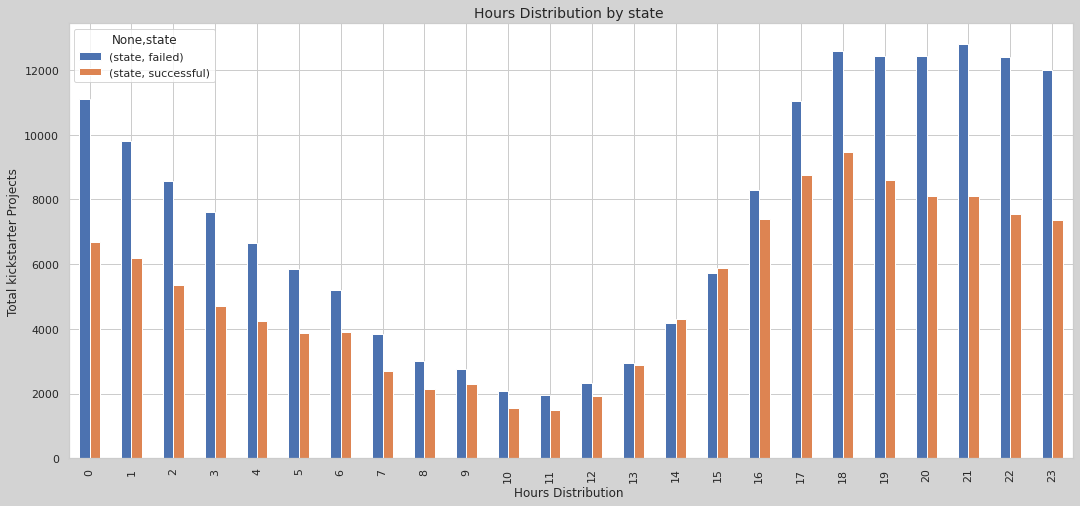

In [24]:
                 # ----- main_category ------ State ------- #
# for CEO

df.groupby(["hour","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Hours Distribution ")

plt.title("Hours Distribution by state ", fontsize=14)
plt.savefig('8.png')
plt.show()

 ### -- Observations --
 #### ++ between 14h and 16h is the best time to lunch a kickstarter
 #### ++ between 18h and 5h is the worst time to lunch a kickstarter (I always thought that between 18 and 19h is the best time: thanks DS to correct me)

 ### -- Goal --

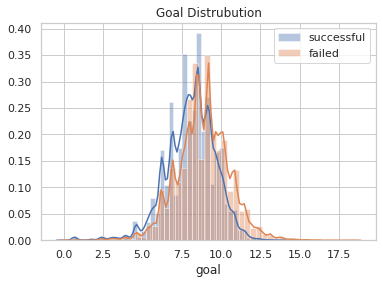

In [25]:
#let's plot the distibution of Goal
sns.distplot(np.log(df[df['state'] == 'successful']['goal']+1), label='successful')
sns.distplot(np.log(df[df['state'] == 'failed']['goal']+1), label='failed')
plt.title('Goal Distrubution')
plt.legend()
plt.savefig('9.png')
plt.show()

In [26]:
# for better understanding, i will map the column goal
criteria = [df['goal'].between(0, 1000), df['goal'].between(1000, 2000), df['goal'].between(2000, 3000), df['goal'].between(3000, 4000), 
            df['goal'].between(4000, 5000), df['goal'].between(5000, 6000), df['goal'].between(6000, 7000), df['goal'].between(7000, 10000),
            df['goal'].between(10000, 20000),df['goal'].between(20000, np.inf)]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['mp_goal'] = np.select(criteria, values, 0)

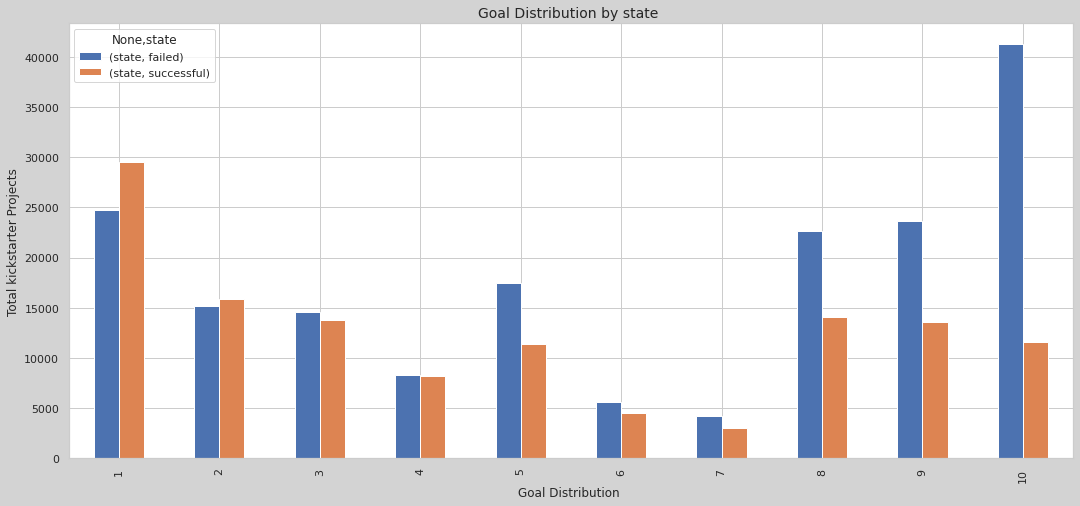

In [27]:
                 # ----- Goal ------ State ------- #

df.groupby(["mp_goal","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Goal Distribution ")

plt.title("Goal Distribution by state ", fontsize=14)
plt.savefig('10.png')
plt.show()

 ### -- Observations --
 #### ++ goals that have values below 2000 Usd have a better chance to succees
 #### ++ goals that have values between 3000 and 4000 Usd have almost a 50/50 chance to succee
 #### ++ goals that have values more than 10000$ have the worst chances to succee


 ### -- Duration --

In [28]:
# calculate duration and assign it to a new column
df['duration'] = (df['deadline'] - df['launched']).dt.days
print("Duration values are between {} and {} days".format(min(df.duration.unique()),max(df.duration.unique())))

Duration values are between 0 and 91 days


In [29]:
# for better understanding, i will map the column duration

criteria = [df['duration'].between(0, 10), df['duration'].between(10, 20), df['duration'].between(20, 30), df['duration'].between(30, 40), 
            df['duration'].between(40, 50), df['duration'].between(50, 60), df['duration'].between(60, 70), df['duration'].between(70, 80),
           df['duration'].between(80, np.inf)]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9 ]
df['mp_duration'] = np.select(criteria, values, 0)


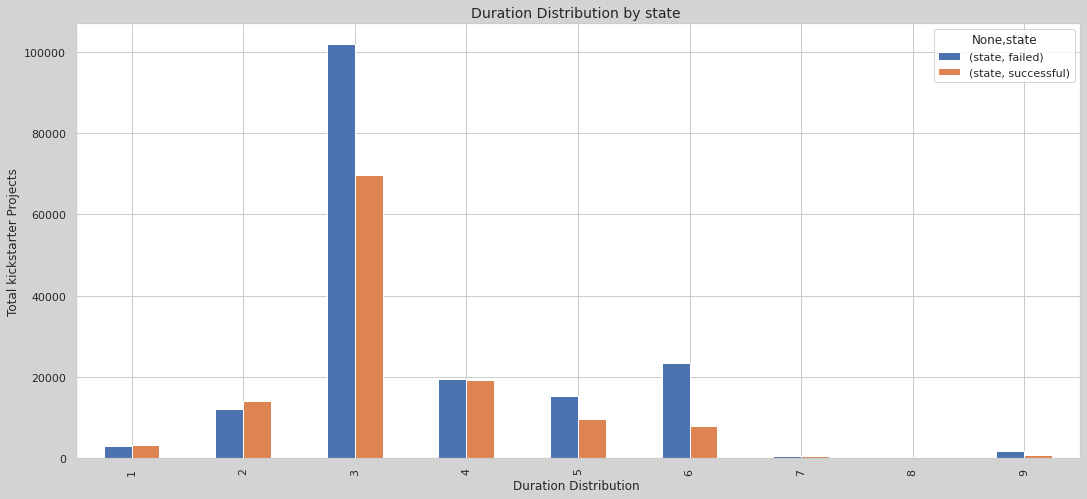

In [30]:
                 # ----- duration ------ State ------- #
df.groupby(["mp_duration","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18,8)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Duration Distribution ")

plt.title("Duration Distribution by state ", fontsize=14)
plt.savefig('11.png')
plt.show()


 ### -- Observations --
 #### ++ duration that are under 20 days have a better chance to succees
 #### ++ duration that that are between 30 and 40 days have almost a 50/50 chance for success
 #### ++ duration between 40 and 50 days have the worst chances for success
 #### ++ PS: At a first look it seems like that projects with the duration of 30 days are more likely to fail. Kickstarters though, have to look at the standard setting of this. Maybe its exactly 30 days, thats why every project which havent been planned thoroughly has 30 days duration. So it would be a little biased.


 ### -- Best scenarios of the category Theater --

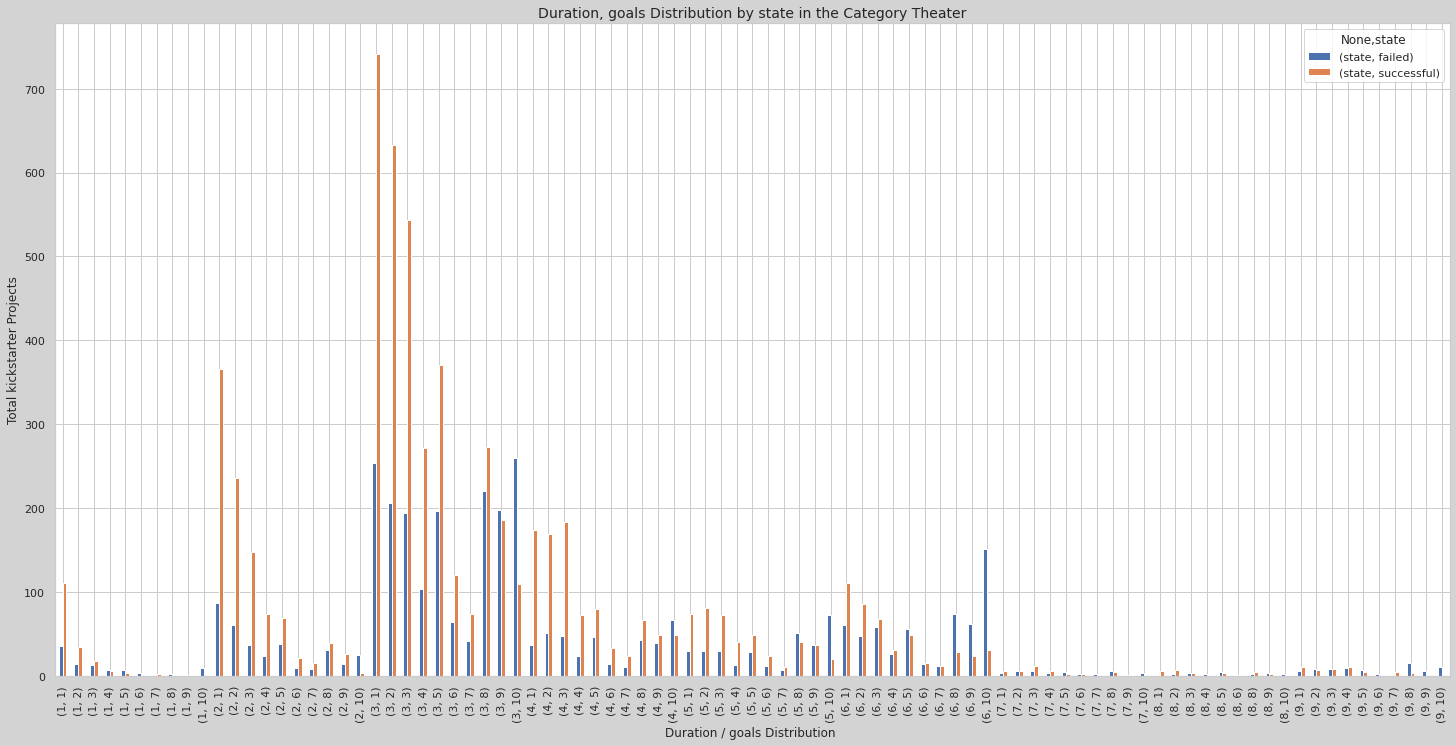

In [31]:
# for the DS Team Head
df_tmp = df[(df.main_category == "Theater")]
df_tmp.groupby(["mp_duration","mp_goal","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(25,12)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Duration / goals Distribution ")

plt.title("Duration, goals Distribution by state in the Category Theater", fontsize=14)

plt.show()

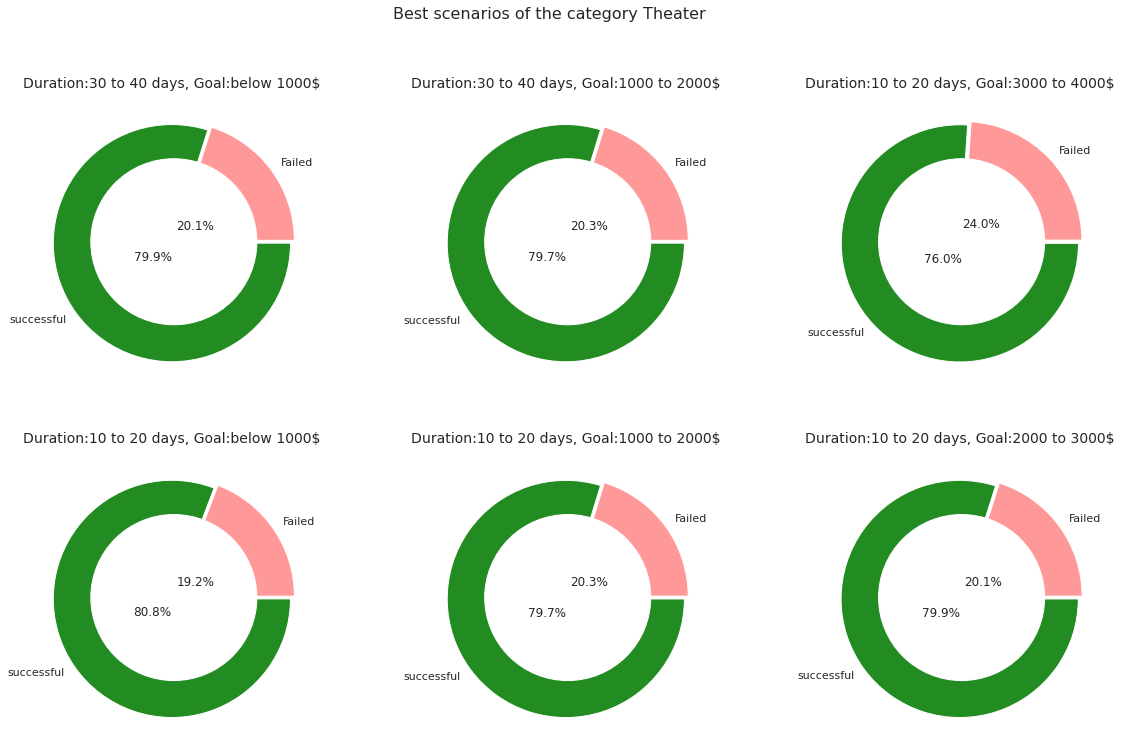

In [32]:
# for the CEO
    
the_grid = GridSpec(2, 3)
colors = ['#ff9999','#228B22']
cat = "Theater"

plt.subplot(the_grid[0, 1])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 2)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:30 to 40 days, Goal:1000 to 2000$ ", fontsize=14);

plt.subplot(the_grid[0, 0])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 3)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:30 to 40 days, Goal:below 1000$ ", fontsize=14);

plt.subplot(the_grid[1, 0])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:below 1000$ ", fontsize=14);

plt.subplot(the_grid[1, 1])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 2)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:1000 to 2000$ ", fontsize=14);

plt.subplot(the_grid[0, 2])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 4)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:3000 to 4000$ ", fontsize=14);

plt.subplot(the_grid[1, 2])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 3)  & (df.main_category == cat)]
multi_plt(df_tmp)


plt.title("Duration:10 to 20 days, Goal:2000 to 3000$ ", fontsize=14);
fig.suptitle('Best scenarios of the category Theater', fontsize=16)
plt.savefig('12.png')
plt.show()


 ### -- Best scenarios of the category Music --

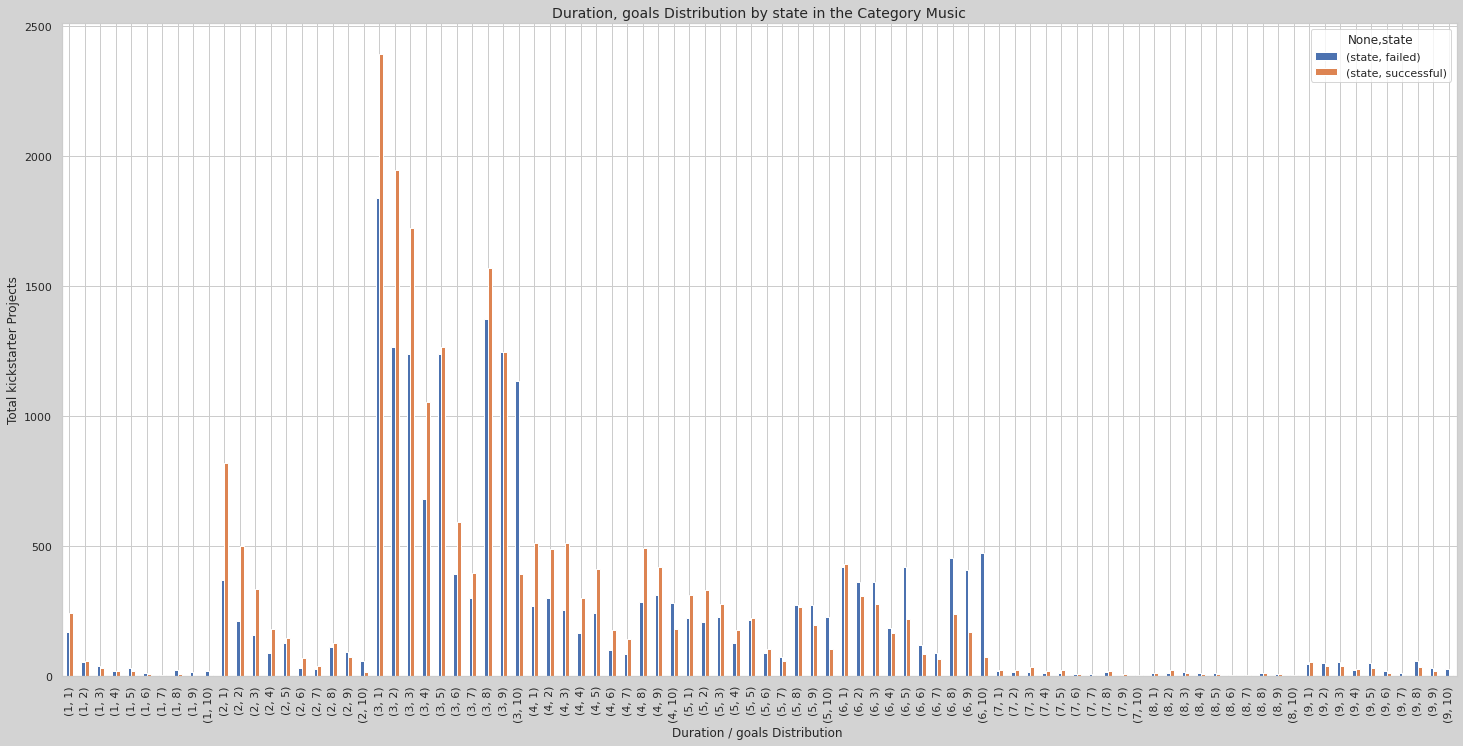

In [33]:
# for the DS Team Head
df_tmp = df[(df.main_category == "Music")]
df_tmp.groupby(["mp_duration","mp_goal","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(25,12)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Duration / goals Distribution ")

plt.title("Duration, goals Distribution by state in the Category Music", fontsize=14)
plt.show()

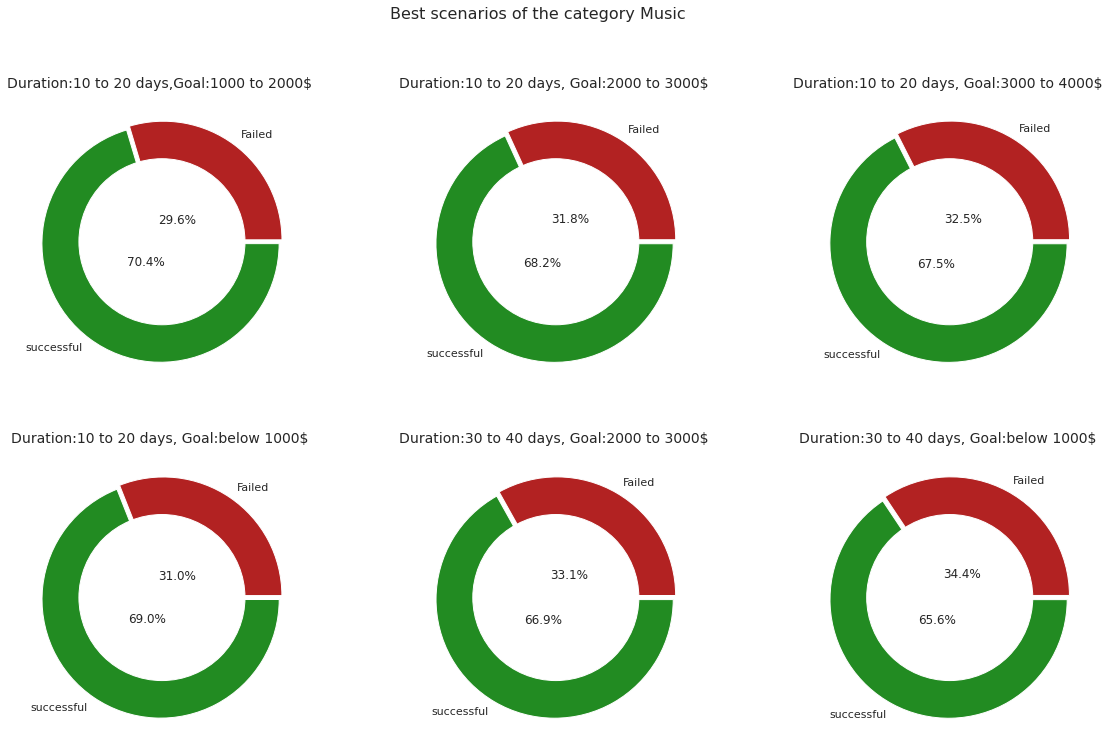

In [34]:
# for the CEO

the_grid = GridSpec(2, 3)
colors = ['#B22222','#228B22']
cat = "Music"


plt.subplot(the_grid[0, 0])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 2)  & (df.main_category == cat)]
multi_plt(df_tmp)    
plt.title("Duration:10 to 20 days,Goal:1000 to 2000$ ", fontsize=14);

plt.subplot(the_grid[0, 1])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 3)  & (df.main_category == cat) ]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:2000 to 3000$ ", fontsize=14);


plt.subplot(the_grid[0, 2])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 4)  & (df.main_category == cat) ]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:3000 to 4000$ ", fontsize=14);

plt.subplot(the_grid[1, 0])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 1)  & (df.main_category == cat) ]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:below 1000$ ", fontsize=14);

plt.subplot(the_grid[1, 1])
df_tmp = df[(df.mp_duration == 4) & (df.mp_goal == 3)  & (df.main_category == cat) ]
multi_plt(df_tmp)
plt.title("Duration:30 to 40 days, Goal:2000 to 3000$ ", fontsize=14);


plt.subplot(the_grid[1, 2])
df_tmp = df[(df.mp_duration == 4) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:30 to 40 days, Goal:below 1000$ ", fontsize=14);

fig.suptitle('Best scenarios of the category Music', fontsize=16)

plt.savefig('13.png')
plt.show()

 ### -- Best scenarios of the category Comics --

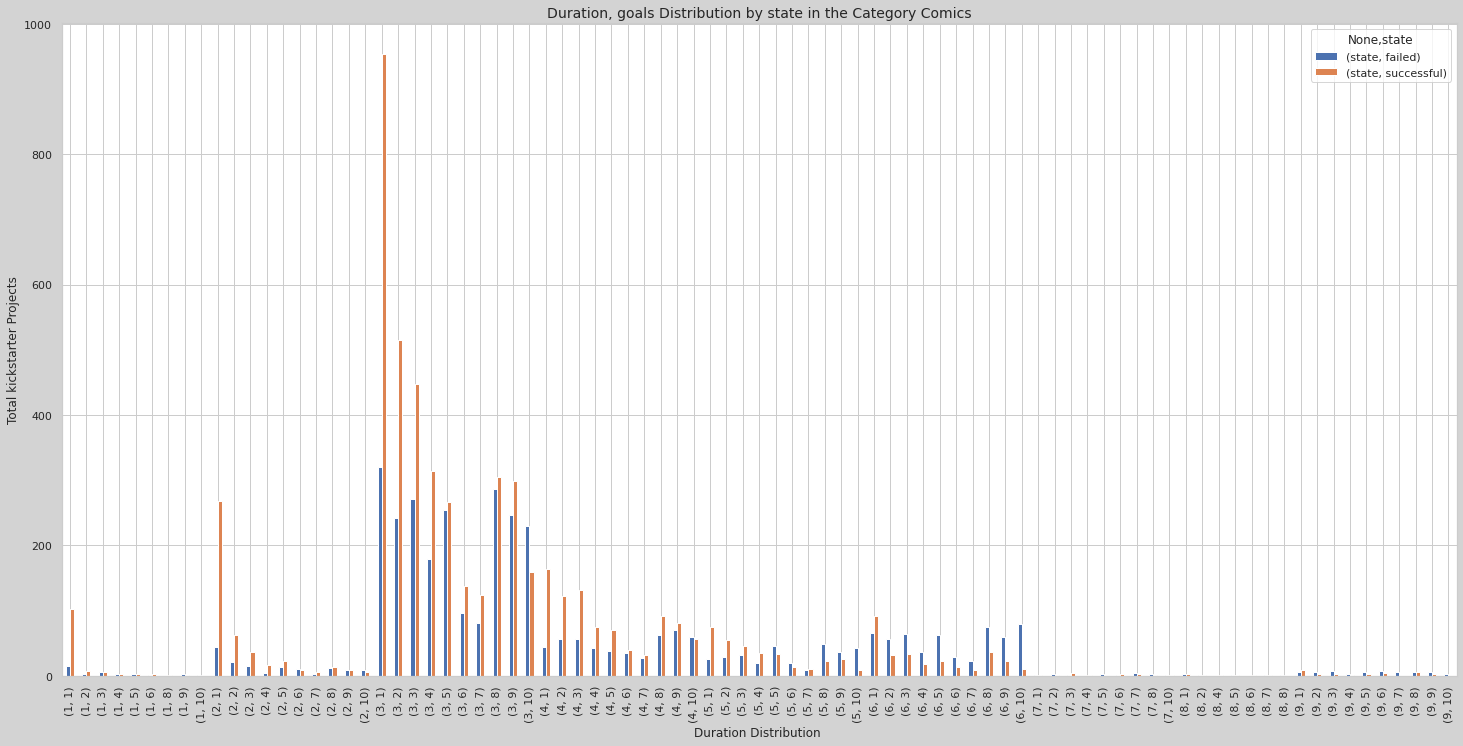

In [35]:
# for the DS Team Head
df_tmp = df[(df.main_category == "Comics")]
df_tmp.groupby(["mp_duration","mp_goal","state"])[["state"]].count().unstack().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(25,12)
fig.set_facecolor('lightgrey')
for axis in fig.axes:
        axis.yaxis.set_label_text( "Total kickstarter Projects")
        axis.xaxis.set_label_text( "Duration Distribution ")

plt.title("Duration, goals Distribution by state in the Category Comics", fontsize=14)
plt.show()

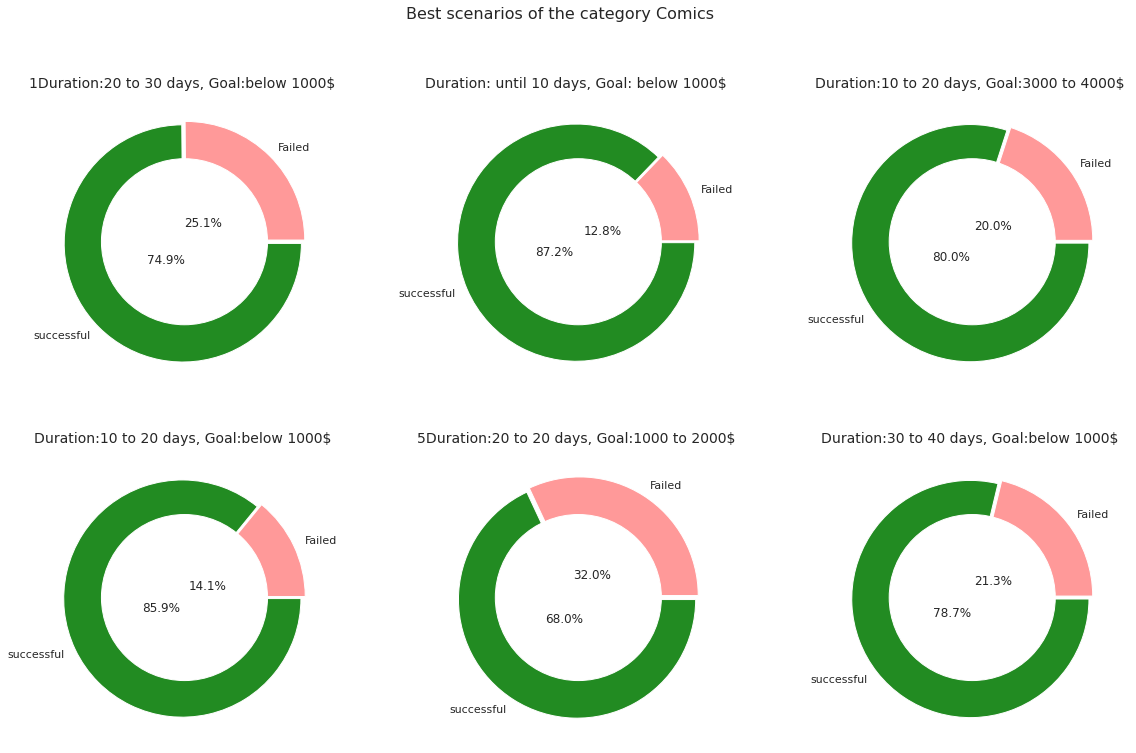

In [36]:
# for the CEO

the_grid = GridSpec(2, 3)
colors = ['#ff9999','#228B22']
cat = "Comics"
plt.subplot(the_grid[0, 1])
df_tmp = df[(df.mp_duration == 1) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration: until 10 days, Goal: below 1000$ ", fontsize=14);

plt.subplot(the_grid[0, 0])
df_tmp = df[(df.mp_duration == 3) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("1Duration:20 to 30 days, Goal:below 1000$ ", fontsize=14);

plt.subplot(the_grid[1, 0])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:below 1000$ ", fontsize=14);

plt.subplot(the_grid[1, 1])
df_tmp = df[(df.mp_duration == 3) & (df.mp_goal == 2)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("5Duration:20 to 20 days, Goal:1000 to 2000$ ", fontsize=14);

plt.subplot(the_grid[0, 2])
df_tmp = df[(df.mp_duration == 2) & (df.mp_goal == 4)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:10 to 20 days, Goal:3000 to 4000$ ", fontsize=14);

plt.subplot(the_grid[1, 2])
df_tmp = df[(df.mp_duration == 4) & (df.mp_goal == 1)  & (df.main_category == cat)]
multi_plt(df_tmp)
plt.title("Duration:30 to 40 days, Goal:below 1000$ ", fontsize=14);

fig.suptitle('Best scenarios of the category Comics', fontsize=16)

plt.savefig('14.png')
plt.show()


In [37]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,hour,day,month,year,mp_goal,duration,mp_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,0.0,0.0,1533.95,12,11,8,2015,1,58,6
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,100.0,2421.0,30000.00,4,2,9,2017,10,59,6
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,220.0,220.0,45000.00,0,12,1,2013,10,44,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,1.0,1.0,5000.00,3,17,3,2012,5,29,3
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,52375.0,52375.0,50000.00,13,26,2,2016,10,34,4


In [38]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'hour', 'day',
       'month', 'year', 'mp_goal', 'duration', 'mp_duration'],
      dtype='object')

In [39]:
# let's create a clean new dataframe and tell panads about all the categorical columns
new_df = pd.DataFrame()

new_df = convert_cat_2_num(df[["state","category","main_category","currency","country"]])
new_df["goal"] = df["goal"]
new_df["pledged"] = df["pledged"]
new_df["backers"] = df["backers"]
new_df["hour"] = df["hour"]
new_df["mp_goal"] = df["mp_goal"]
new_df["mp_duration"] = df["mp_duration"]
new_df["duration"] = df["duration"]

new_df.head()

,state,category,main_category,currency,country,goal,pledged,backers,hour,mp_goal,mp_duration,duration
0,0,108,12,1,1,1000.0,0.0,0,12,1,6,58
1,0,93,6,2,2,30000.0,2421.0,15,4,10,6,59
2,0,93,6,2,2,45000.0,220.0,3,0,10,5,44
3,0,90,10,2,2,5000.0,1.0,1,3,5,3,29
5,1,123,7,2,2,50000.0,52375.0,224,13,10,4,34


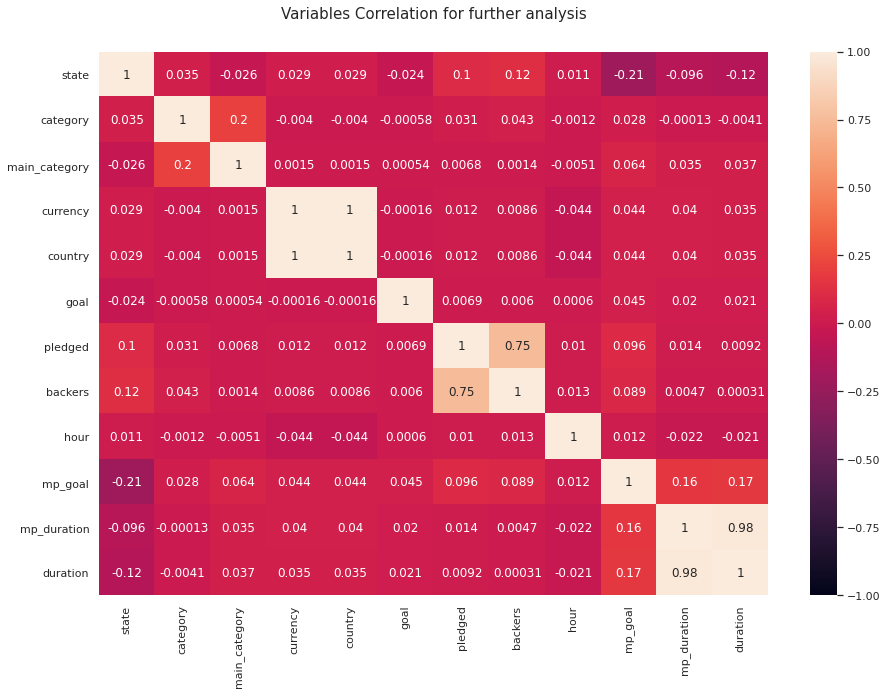

In [40]:
# for the DS team head
#  heatmap

plt.figure(figsize=(15,10))
plt.title('Variables Correlation for further analysis', y=1.05, size=15)
sns.heatmap(new_df.corr(),vmin=-1,  annot=True,)
sns.color_palette("rocket")
plt.savefig('15.png')

plt.show()

<span  style="color:orange; font-size: 200%;">+++ Thanks for reading +++</span>
